In [1]:
import json
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import wikipedia

In [2]:
with open('sentiments0.json', encoding='utf-8') as f:
  data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'sentiments0.json'

In [ ]:
magnitude = []
score = []
index = []

for i in range(len(data['videos'])):
    magnitude.append(data['videos'][i]['magnitude'])
    score.append(data['videos'][i]['sentiment'])
    index.append(data['videos'][i]['video'])

In [ ]:
df = pd.DataFrame()
df['idx'] = index
df['magnitude'] = magnitude
df['sentiment'] = score 

In [77]:
vidInfo = pd.read_csv('vidDataFrame.csv')
vidInfo['ratio'] = vidInfo.likeCount.divide(vidInfo.dislikeCount)

In [78]:
stats = df.groupby(['idx']).describe()

athelte

comedian

scientist/researcher

intellectual/political commentator/pundit

conspiracy/scepticism list

maybe: musician


In [ ]:
jordanB = newFrame[newFrame['title'].str.contains('Alex Jones')]
stat_params = ['title','viewCount','commentCount','likeCount','dislikeCount','ratio','sentiment']
jordanB[stat_params]

newFrame[newFrame.duplicated('title')]['title']

newFrame

newFrame['class'] = [0]*len(newFrame)


for i in range(len(newFrame)):
    if 'Alex Jones' in newFrame.iloc[i]['title']:
        newFrame.iloc[i]['class'] = 1

newFrame['title'].str.contains('Alex Jones').any()

In [80]:
def get_csv_list(file):
    with open(file, encoding='utf-8') as f:
        r = csv.reader(f)
        return_list = list(r)
    return_list = return_list[0]
    f.close()
    return return_list

In [81]:
classes = get_csv_list('classeslist0.csv')
for i in range(len(classes)):
    classes[i] = int(classes[i])
classes = classes + [1]*134

In [82]:
vidInfo['class'] = classes

In [83]:
vidInfo.groupby(['class']).count()

,Unnamed: 0,commentCount,comments,date,dislikeCount,likeCount,title,viewCount,ratio
class,,,,,,,,,
0,475,475,475,475,475,475,475,475,475
1,260,260,260,260,260,260,260,260,260
2,556,556,556,556,556,556,556,556,556
3,103,103,103,103,103,103,103,103,103


In [96]:
test = pd.read_csv('vidSansComments.csv')

Index(['date', 'Unnamed: 0', 'commentCount', 'date.1', 'dislikeCount',
       'likeCount', 'title', 'viewCount', 'ratio', 'class', 'sentiment',
       'magnitude'],
      dtype='object')


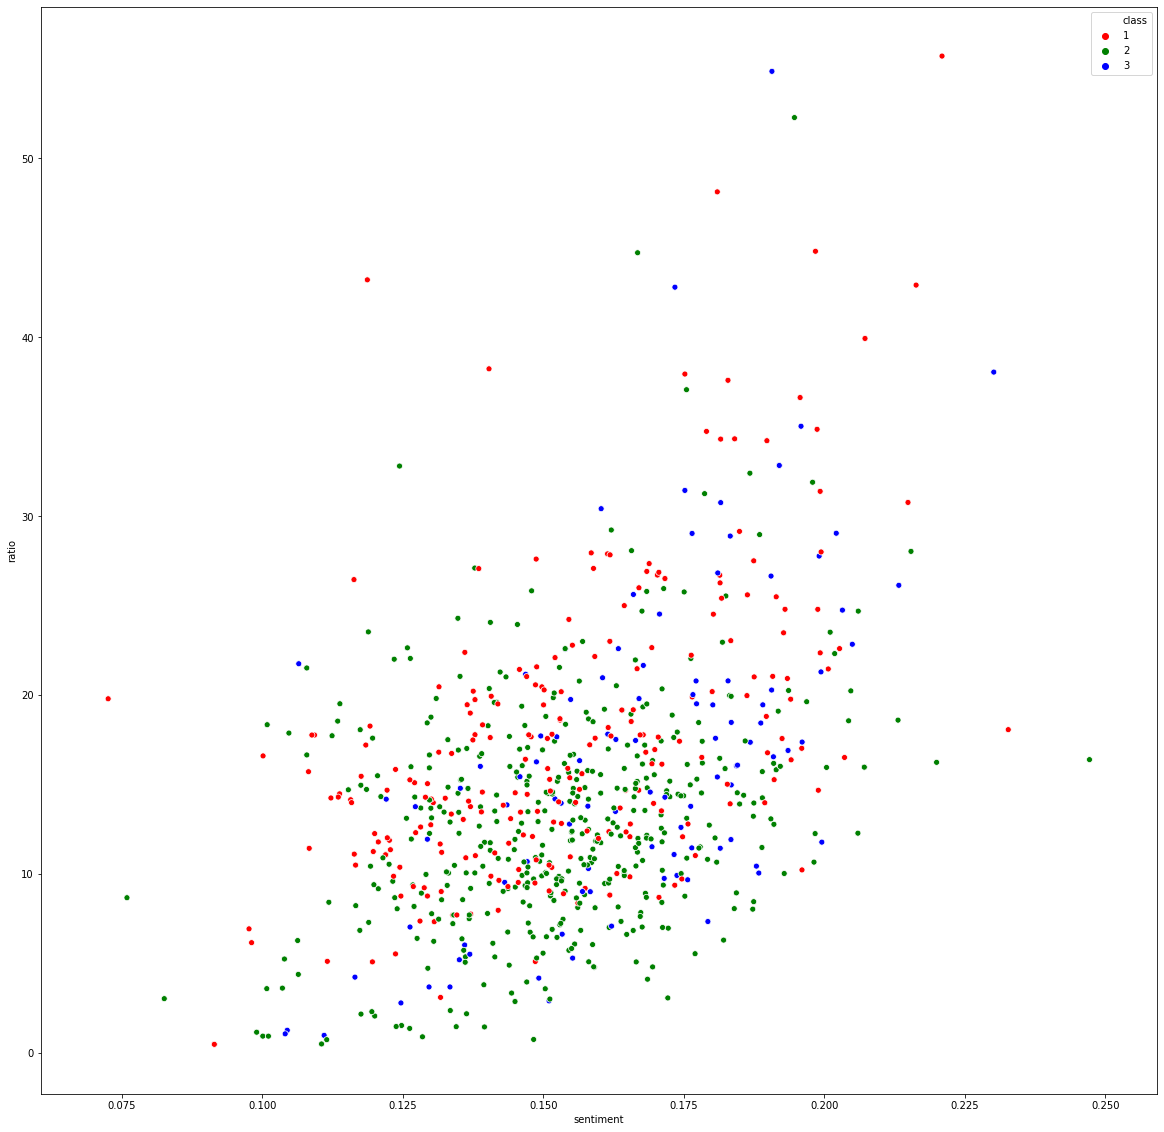

In [103]:
view = test[(test['commentCount'] > 100) & (test['class'] > 0) ]
print(test.columns)
plt.figure(figsize=(20, 20))

sns.scatterplot(data=view, x='sentiment',y='ratio',hue='class',palette=['r','g','b'])

In [108]:
test[test['class'] == 0][['class','title']]

,class,title
30,0,Joe Rogan Experience #37 - Ricky Schroder
35,0,Joe Rogan Experience #44 - Todd McCormick (Par...
37,0,Joe Rogan Experience #46 - Chris Aubrey Marcus...
38,0,Joe Rogan Experience #46 - Chris Aubrey Marcus...
48,0,Joe Rogan Experience #74 - Allison Sciulla
57,0,Joe Rogan Experience #87 - Dana Dearmond
69,0,Joe Rogan Experience #96 - Kevin Pereira
85,0,Joe Rogan Experience #112 - Cliff Bleszinski &...
92,0,Joe Rogan Experience #119 - Jan Irvin
98,0,Joe Rogan Experience #125 - Giorgio A. Tsoukal...
